# **Practice Project: Insurance Cost Analysis**


In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|sex| Male or Female| object|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | object| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 - Use Random Forest to develop the model with highest score and visualising the top features
 


# Setup


For this analysis, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Importing Required Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import requests
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")
from ipywidgets import interact,interactive,fixed,interact_manual
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm
import requests


### Download the dataset to this lab environment

In [2]:
# Import the dataset into a `pandas` dataframe.
df = pd.read_csv('Medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(2772, 7)

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# replace the '?' entries with NaN values
df.replace('?',np.nan, inplace=True)

#  Data Wrangling


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2769 non-null   object 
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2771 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 151.7+ KB


In [8]:
mean_age = df['age'].astype(float).mean(axis=0)
df['age'].replace(np.nan,mean_age , inplace=True)

most_frequent = df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan, most_frequent, inplace=True)


In [9]:
# label coding to change categorical columns to continous: 
# Map 'sex' column: female -> 1, male -> 0
df['sex'] = df['sex'].map({'female': 0, 'male': 1})

# Map 'smoker' column: yes -> 1, no -> 0
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Map 'region' column: southwest -> 1, southeast -> 2, northwest -> 3, northeast -> 4
region_mapping = {'southwest': 3, 'southeast': 4, 'northwest': 1, 'northeast': 2}
df['region'] = df['region'].map(region_mapping)


In [10]:
df[['age', 'smoker']] = df[['age', 'smoker']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   int64  
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   int64  
 5   region    2772 non-null   int64  
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [11]:
df[['charges']]= np.round(df[['charges']],2)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92
1,18,1,33.770,1,0,4,1725.55
2,28,1,33.000,3,0,4,4449.46
3,33,1,22.705,0,0,1,21984.47
4,32,1,28.880,0,0,1,3866.86


# Exploratory Data Analysis (EDA)

<Axes: xlabel='bmi', ylabel='charges'>

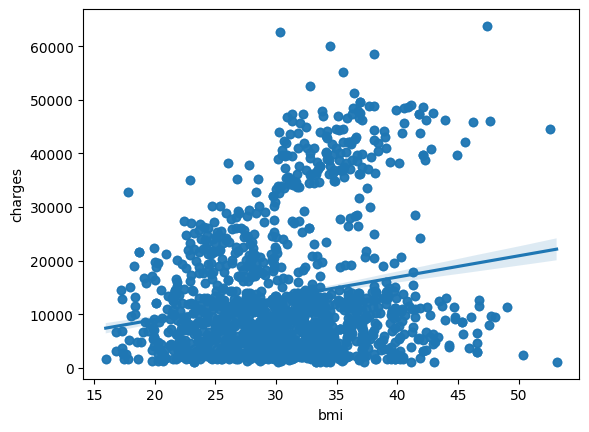

In [14]:
# Implement the regression plot for `charges` with respect to `bmi`. 
sns.regplot(x= 'bmi', y='charges', data=df)

In [15]:
# testing with .corr() function to verifying the plot 
df[["bmi", "charges"]].corr()

,bmi,charges
bmi,1.000000,0.199846
charges,0.199846,1.000000


In [16]:
# Testing with pearson correlation 
pearson_coef, p_value = stats.pearsonr(df['bmi'], df['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.19984605168370886  with a P-value of P = 2.29351916547895e-26


Correlation Strength: The Pearson correlation coefficient of 0.1998 shows a weak positive linear relationship between the two variables.

Statistical Significance: The p-value of 2.29351916547895e−26 indicates that this weak positive correlation is statistically significant and very unlikely to have occurred by chance.

<Axes: xlabel='age', ylabel='charges'>

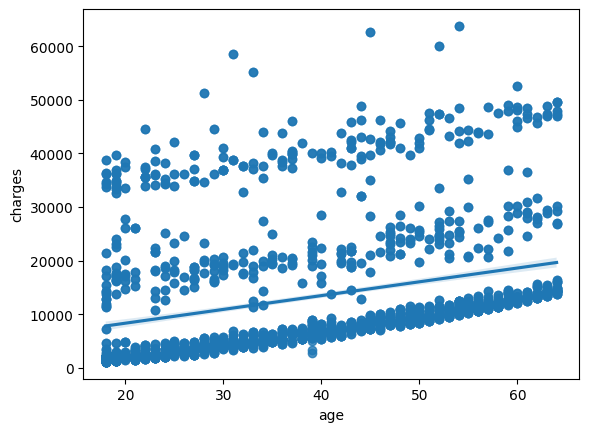

In [17]:
# Implement the regression plot for `charges` with respect to `age`. 
sns.regplot(x = "age", y = "charges", data = df)

In [18]:
# Testing with corr() to verifying 
df[['age', 'charges']].corr()

,age,charges
age,1.000000,0.297902
charges,0.297902,1.000000


In [19]:
# 
pearson_coef , p_value = stats.pearsonr(df['age'], df['charges'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.2979017844408458  with a P-value of P = 6.397003053651366e-58


Correlation Strength: The Pearson correlation coefficient of 0.2979 suggests a positive, moderate linear relationship between the two variables. This means that as one variable increases, the other variable tends to increase as well, but the relationship is not particularly strong.

Statistical Significance: The p-value of 6.397003053651366e−58 indicates that this moderate correlation is highly statistically significant, meaning it is very unlikely to have occurred by chance

<Axes: xlabel='smoker', ylabel='charges'>

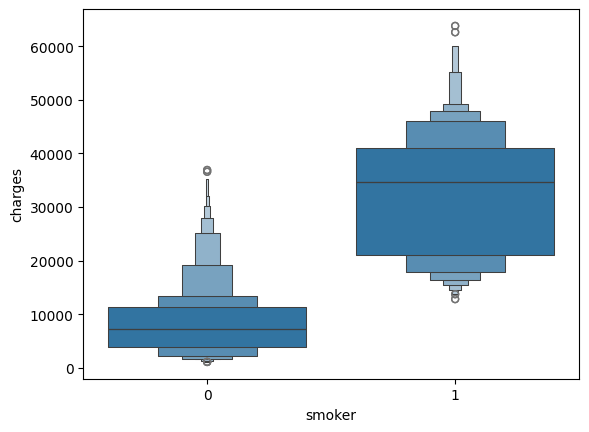

In [20]:
# Implement the box plot for `charges` with respect to `smoker`.

sns.boxenplot(x= 'smoker', y='charges', data=df)

In [21]:
# Print the correlation matrix for the dataset.
corr_matrix = df.corr()
corr_matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.026414,0.113135,0.038116,-0.023886,-0.007743,0.297902
sex,-0.026414,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113135,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
children,0.038116,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023886,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007743,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.297902,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


<Axes: >

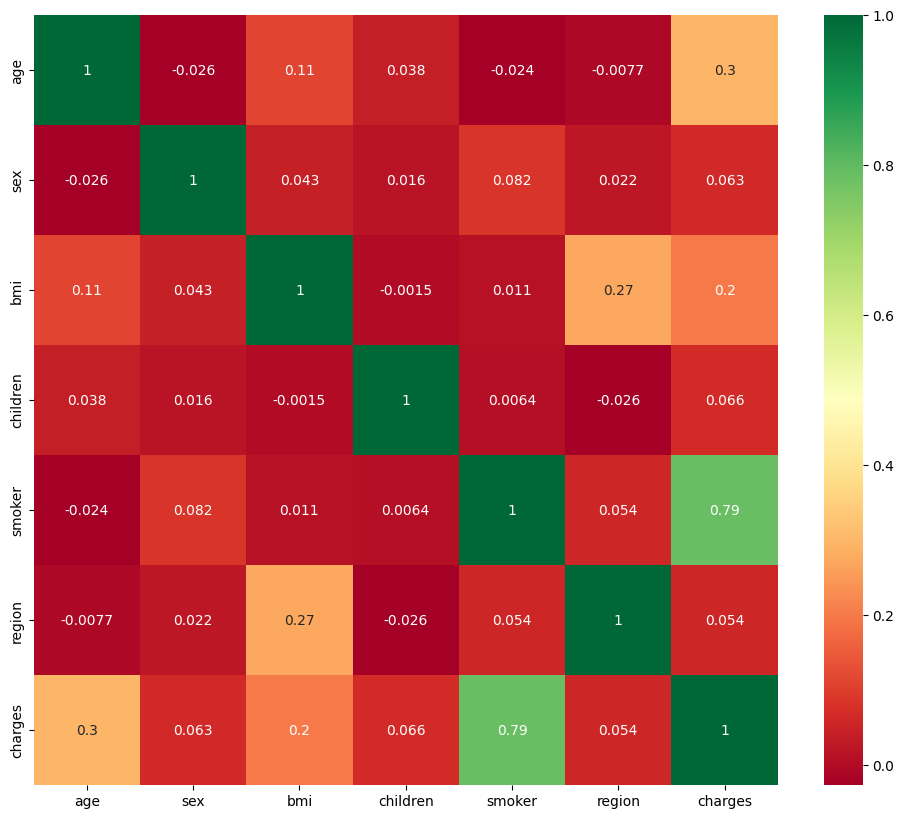

In [22]:
# using heatmap to have a better visalisation of the corr() dataframe
width = 12
height = 10

plt.figure(figsize=(width, height))
sns.heatmap(corr_matrix,
           cmap="RdYlGn",annot=True)

### Conclusion: 
Now we have better illustration of the the featueres influcne on the charge! the most one is Smoker feature. 


# Model Development

### Model 1: simple linear regression

In [23]:
# Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset.
X = df[['smoker']]
y = df['charges']

lr= LinearRegression()
lr.fit(X,y)

lr_score = lr.score(X,y)
print(f'The R^2 for our single linear regression is : {lr_score}')

y_prd = lr.predict(X)
# get the mean square error
mse_lr = mean_squared_error(y,y_prd)
print(f'The mean squared error for our single linear regression is : {mse_lr}')

The R^2 for our single linear regression is : 0.6221791733924185
The mean squared error for our single linear regression is : 55770970.49293007


The 𝑅2 value of 0.6222 suggests that the model does a reasonably good job of explaining the variance in the data, though not perfectly.

The MSE of 55,770,970.49293007 indicates the average squared error in our predictions, but without context about the scale of your data, it’s difficult to say whether this error is small or large in practical terms.

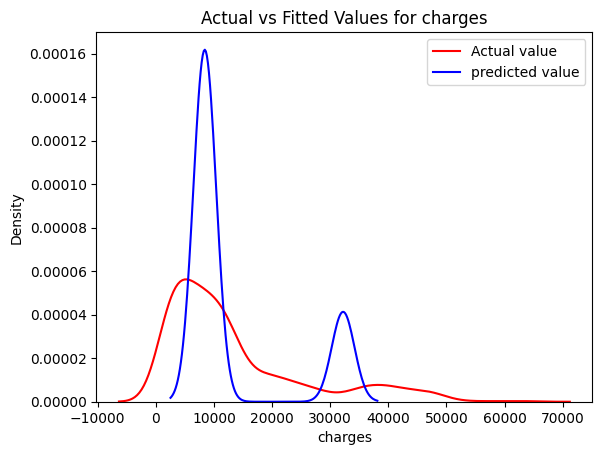

In [24]:
ax1 = sns.distplot(df['charges'], hist=False, color="r", label="Actual Value")
sns.distplot(y_prd, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for charges')
plt.xlabel('charges')
plt.ylabel('Density')
plt.legend(['Actual value', 'predicted value'])

plt.show()
plt.close()

We can see that with single attribues the actual and predicted values from our model are not match and we need to use other features in the dataset. 

### Model 2 : Multiple linear regression: 


In [25]:
# Fit a linear regression model that may be used to predict the `charges` value, by using the more features from our dataset. 

Z = df[["age", "sex", "bmi", "children", "smoker", "region"]]
Y = df['charges']

lm = LinearRegression()
lm.fit(Z,Y)

LinearRegression()

In [26]:
print(f'The R^2 for our multiple linear regression is : {lm.score(Z,Y)} ')

Y_prd = lm.predict(Z)
print(f'The mean squared error for our mulitiple linear regression is :{mean_squared_error(Y, Y_prd)}')

The R^2 for our multiple linear regression is : 0.7502280516205417 
The mean squared error for our mulitiple linear regression is :36869391.473489754


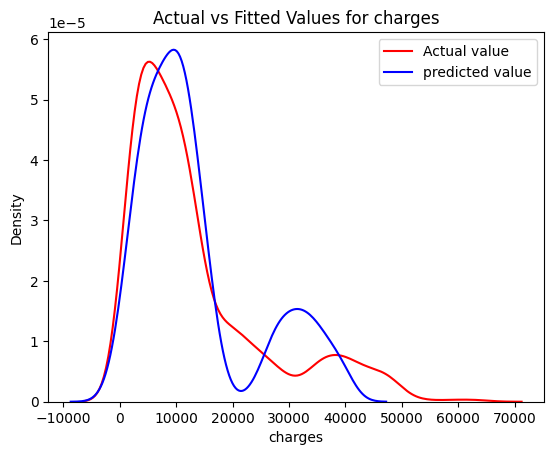

In [90]:
ax1 = sns.distplot(df['charges'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_prd, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for charges')
plt.xlabel('charges')
plt.ylabel('Density')
plt.legend(['Actual value', 'predicted value'])

plt.show()
plt.close()

As we can see there more overlaps by including more features from our dataset, although it can be improved. 

### Model 3: Polynomial Regression

In [27]:
# Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` 
# Create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

pipe = Pipeline(Input)
pipe


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [28]:
# Y and Z use the same values as defined in previous cells
Z = Z.astype(float)

pipe.fit(Z,Y)

Y_pipe = pipe.predict(Z)

print(f'The R^2 for our Polynomial regression is : {r2_score(Y, Y_pipe)} ')

print(f'The mean squared error for our mulitiple linear regression is :{mean_squared_error(Y, Y_pipe)}')



The R^2 for our Polynomial regression is : 0.8443681766164303 
The mean squared error for our mulitiple linear regression is :22973158.75257735


###  Model Refinement

In [29]:
# Y and Z use the same values as defined in previous cells

# 30%  of the data to the test and 70% of the data to train
x_train,x_test,y_train,y_test = train_test_split(Z,Y,test_size=0.3,random_state=1)

In [30]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

In [31]:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|          | 0/999 [00:00<?, ?it/s]

100%|██████████| 999/999 [00:02<00:00, 342.40it/s, Test Score=0.813, Train Score=0.857]


In [32]:
RidgeModel=Ridge(alpha=0.01)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.7116014728439017


In [33]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8132931749182154


0.8132931749182154


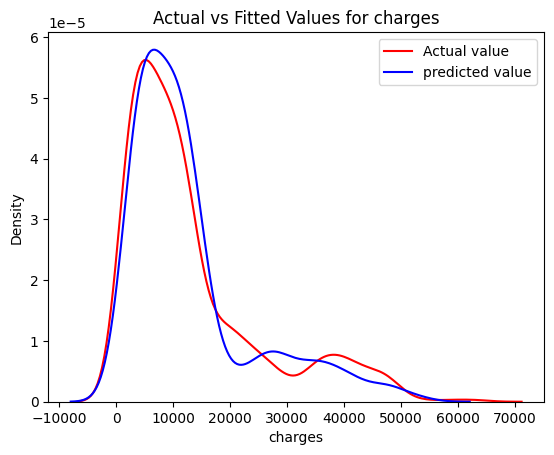

In [34]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

ax1 = sns.distplot(df['charges'], hist=False, color="r", label="Actual Value")
sns.distplot(y_hat , hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for charges')
plt.xlabel('charges')
plt.ylabel('Density')
plt.legend(['Actual value', 'predicted value'])

plt.show()
plt.close()

In [36]:
# 30%  of the data to the test and 70% of the data to train
x_train,x_test,y_train,y_test = train_test_split(Z,Y,test_size=0.3,random_state=1)

In [37]:
Rf = RandomForestRegressor()

model_1=Rf.fit(x_train,y_train)

In [38]:
Y_pred = Rf.predict(x_test)

In [39]:
r2_score(y_test, Y_pred)


0.9235325094784885

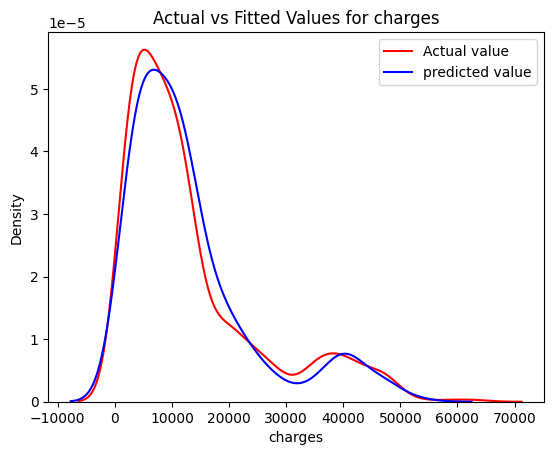

In [40]:
Y_pred = Rf.predict(x_test)
ax1 = sns.distplot(df['charges'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred , hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for charges')
plt.xlabel('charges')
plt.ylabel('Density')
plt.legend(['Actual value', 'predicted value'])

plt.show()
plt.close()

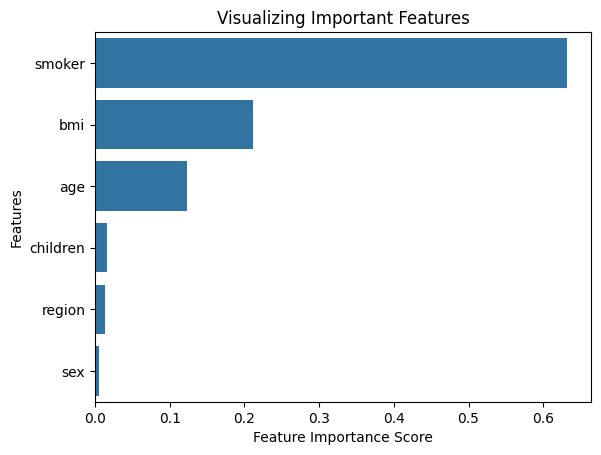

In [124]:
# Get feature importances
feature_importances = pd.Series(Rf.feature_importances_, index=x_train.columns)

# Sort and plot the feature importances
feature_importances = feature_importances.sort_values(ascending=False)
sns.barplot(x=feature_importances, y=feature_importances.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

# Conclusion:
like we previously noticed smoking is the greatest factor that affects medical insurance cost charges, then it's age and bmi. Polynomial Regression with 0.8132 and Random Forest models with 0.9235  turned out to be the best models with Random Forest with better performance. 